## Backtest for all models

In [1]:
import os
import torch
import backtest as bt
from utils import *
os.environ['KMP_DUPLICATE_LIB_OK'] = "True"

In [2]:
def model_backtest(model_name, mode = "eval", gen_weight = False, device = "cuda:0", batch_size=128):
    """Weight generation and backtest for models"""
    assert model_name in ["FactorVAE", "Transformer", "LSTM", "PatchTST"], "The model name is wrong, try 'FactorVAE', 'Transformer', 'LSTM'"
    # Get training weight
    weight_path = f"../backtest/{model_name}/{mode}/weights.csv"
    if (not os.path.exists(weight_path)) or gen_weight:
        print("===== Generating the weight =====")
        model = torch.load(f"../models/{model_name}.pth")  # load the model 
        model = model.to(device)
        if model_name == "FactorVAE":
            features, returns = get_dataset(mode)  # load the dataset
            # test_dl = get_dataloader_factorVAE(features, returns, device, batch_size, shuffle=False)
            weights = get_weights(model, features, type=mode, repeat=5)
        if model_name in ["Transformer", "LSTM", "PatchTST"]:
            features, returns = dataset_dim_convertion_4to3(*get_dataset(mode))
            test_dl = get_dataloader_factorVAE(features, returns, device, batch_size, shuffle=False)
            weights = get_weights_ts(model, test_dl, type=mode, stock_nums=20)
        weights.to_csv(weight_path)
    # Params for backtest
    with open(f"../data/dataset_tensor/{mode}/date.txt", "r") as file:
        dates = [date.split("\n")[0] for date in file.readlines()]
    param = dict()
    param["init_value"] = 1
    param["start_date"] = dates[1] # Shift 1 day because of the cap between prediction and backtest
    param["end_date"] = dates[-1]
    param["threshold"] = 1
    param["days_back"] = 20
    param["fee"] = True
    param["stock_price"] = "../backtest/close.csv"  # close data
    param["stock_weight"] = f"../backtest/{model_name}/{mode}/weights.csv" # weight of strategy
    param["result_savepath"] = f"../backtest/{model_name}/{mode}/result.xlsx" # result save path
    # Backtest
    backtest_result = bt.backtest(param)
    return backtest_result


## Part-1 Factor VAE

===== Generating the weight =====
Avaiable models: LSTM Transformer FactorVAE PatchTST
Total step: 466
Time span: 20
Stock size: 100
Feature size: 143


100%|██████████| 5/5 [00:08<00:00,  1.65s/it]


backtest from 2020-02-10 to 2020-02-11 has been done
backtest from 2020-07-07 to 2020-07-08 has been done
backtest from 2020-12-02 to 2020-12-03 has been done
backtest from 2021-04-30 to 2021-05-06 has been done
backtest from 2021-09-27 to 2021-09-28 has been done
backtest from 2021-12-31 to 2021-12-31 has been done


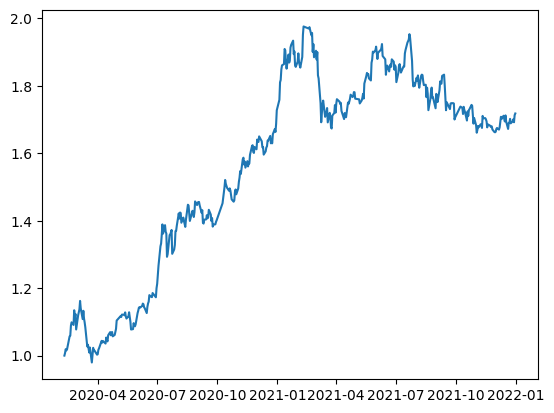

In [3]:
backtest_result_FactorVAE = model_backtest("FactorVAE", gen_weight=True, device="cpu", mode="test")

## Part-2 Transformer

===== Generating the weight =====
Avaiable models: LSTM Transformer FactorVAE PatchTST
Total step: 465
Time span: 20
Stock size: 100
Feature size: 143


364it [00:07, 48.68it/s]


backtest from 2018-01-31 to 2018-02-01 has been done
backtest from 2018-07-04 to 2018-07-05 has been done
backtest from 2018-11-29 to 2018-11-30 has been done
backtest from 2019-05-07 to 2019-05-08 has been done
backtest from 2019-09-26 to 2019-09-27 has been done
backtest from 2019-12-31 to 2019-12-31 has been done


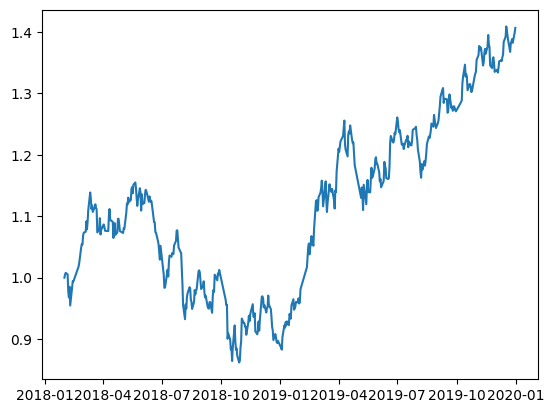

In [3]:
backtest_result_Transformer, y_pred = model_backtest("Transformer", gen_weight=True, device=try_gpu())

backtest from 2018-01-30 to 2018-01-31 has been done
backtest from 2018-07-03 to 2018-07-04 has been done
backtest from 2018-11-28 to 2018-11-29 has been done
backtest from 2019-05-06 to 2019-05-07 has been done
backtest from 2019-09-25 to 2019-09-26 has been done
backtest from 2019-12-31 to 2019-12-31 has been done


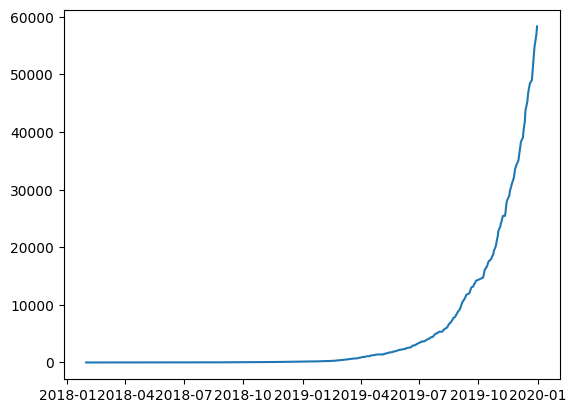

In [11]:
backtest_result_Transformer = model_backtest("LSTM")

In [9]:
backtest_result_PatchTST = model_backtest("PatchTST", gen_weight=True)

===== Generating the weight =====


RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.